## TF-IDF MiniBatchKMeans

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans, KMeans
import matplotlib.cm as cm

## Read the data 

The first step is to read the data of the 500 tweets that we are going to use, this data is stored in a pandas DataFrame.

In [4]:
#df = pd.read_pickle('my_df.pickle')
df = pd.read_pickle('./pickles/500dataset.pickle')
#df = pd.read_pickle('77k_df.pickle')

In [6]:
df

,text,text_processed,vector
0,@sarahtavel What #MustHave #tech gadget can yo...,"[gadget, travel, without, ?, stop, stand, wed]","{'@': [-0.0704075, -0.0324585, 0.0529671, 0.06..."
1,Start-ups from every continent heading to #web...,"[start-ups, every, continent, heading, including]","{'S': [-5.27091, 2.70473, -0.157593, 4.45988, ..."
2,I'm at the #WebSummit2015 this week. On ali(at...,"[i'm, week, ., ali, (, ), goss, (, dot, ), ie,...","{'I': [0.0332858, -0.00211889, 0.0470522, 0.08..."
3,@jalak What #MustHave #tech gadget can you not...,"[gadget, travel, without, ?, stop, stand, wed]","{'@': [-0.0704075, -0.0324585, 0.0529671, 0.06..."
4,#websummit is about to kickoff in #dublin! Wha...,"[kickoff, looking, forward, ?]","{'#': [-1.99362, 0.557125, 0.229587, 1.53814, ..."
5,I'm at the #WebSummit this week. On ali(at)gos...,"[i'm, week, ., ali, (, ), goss, (, dot, ), ie,...","{'I': [0.0332858, -0.00211889, 0.0470522, 0.08..."
6,Liz Halash: one question you need to ask yours...,"[liz, halash, :, one, question, need, ask, wou...","{'L': [-0.0862547, 0.0434853, 0.0529697, 0.047..."
7,@fabricegrinda What #MustHave #tech gadget can...,"[gadget, travel, without, ?, stop, stand, wed]","{'@': [-0.0704075, -0.0324585, 0.0529671, 0.06..."
8,Know someone who needs help with their compute...,"[know, someone, needs, help, computer, science...","{'K': [-0.0409234, 0.0100177, 0.0456978, 0.110..."
9,We are excited &amp; ready for the #WebSummit2...,"[excited, &, ready, today, ., weather, stoppin...","{'W': [-2.20337, 1.15484, -0.0837178, 1.83615,..."


In [8]:
tweet_texts_processed = [str.join(" ", x) for x in df['text_processed']] # list of pre-processed tweet texts

# We use the TfidfVectorizer from sklearn which is a feature extraction technique which obtains 
# a vector representation of the text.
vectorizer = TfidfVectorizer(min_df=4, max_features = 5000)
vz = vectorizer.fit_transform(tweet_texts_processed)

In [13]:
vz.tocsr()

<500x202 sparse matrix of type '<class 'numpy.float64'>'
	with 2019 stored elements in Compressed Sparse Row format>

In [14]:
kmeans = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans_clusters = kmeans.fit_predict(vz)
kmeans_distances = kmeans.fit_transform(vz)

In [15]:
kmeans_distances.shape

(500, 3)

In [16]:
X_tsne = TSNE(learning_rate=200, perplexity=50, random_state=10).fit_transform(kmeans_distances)
X_tsne.shape

(500, 2)

In [17]:
# We define diferent number of clusters

range_n_clusters = [2, 3, 4, 6, 8, 12]

For n_clusters = 2 The average silhouette_score is : 0.0677904917774
For n_clusters = 3 The average silhouette_score is : 0.0698147438029
For n_clusters = 4 The average silhouette_score is : 0.0658527609612
For n_clusters = 6 The average silhouette_score is : 0.0834111961797
For n_clusters = 8 The average silhouette_score is : 0.112094563449
For n_clusters = 12 The average silhouette_score is : 0.105279187109


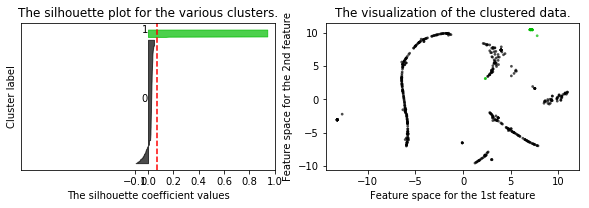

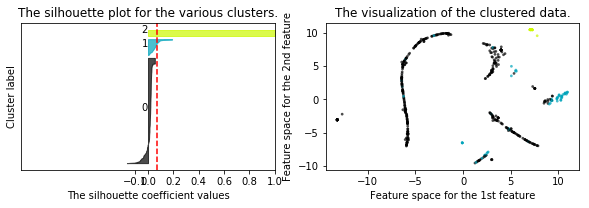

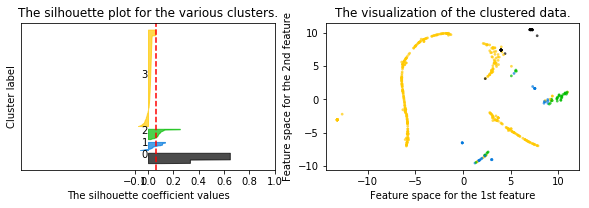

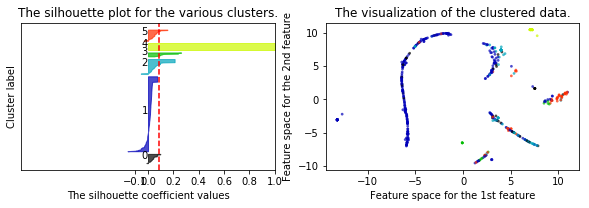

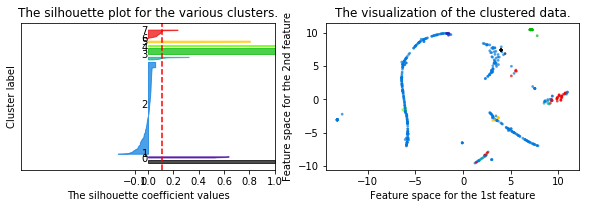

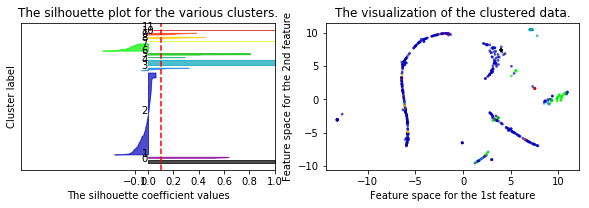

In [18]:
for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    ax1.set_xlim([-1, 1]) # rango de silhouette de -1 a 1
    
    # Generate a cluster using the Mini Batch K-Means algorithm for diferent numbers of clusters
    kmeans = MiniBatchKMeans(n_clusters = n_clusters, random_state=10)
    kmeans_clusters = kmeans.fit_predict(vz)
    
    # Apply the dimensionality reduction to obatin the 2D representation of the points for visualization
    X_tsne = TSNE(learning_rate=200, perplexity=50, random_state=10).fit_transform(kmeans_distances)
    
    # Calculate the silhouette value of the cluster
    silhouette_avg = metrics.silhouette_score(vz, kmeans_clusters)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = metrics.silhouette_samples(vz, kmeans_clusters)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(kmeans_clusters.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    ax2.figure.subplots_adjust(bottom=0.2)
    ax2.figure.savefig('./figures/tfidf_500_cluster%d_%f'% (n_clusters, silhouette_avg), format='eps', dpi=1200)

plt.show()